<a href="https://colab.research.google.com/github/Ehtisham1053/Digital-Image-Processing/blob/main/Comprehensive_Digital_Image_Processing_with_OpenCV_and_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
from google.colab.patches import cv2_imshow

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
os.chdir('/content/drive/My Drive/DIP')
print(os.getcwd())

/content/drive/My Drive/DIP


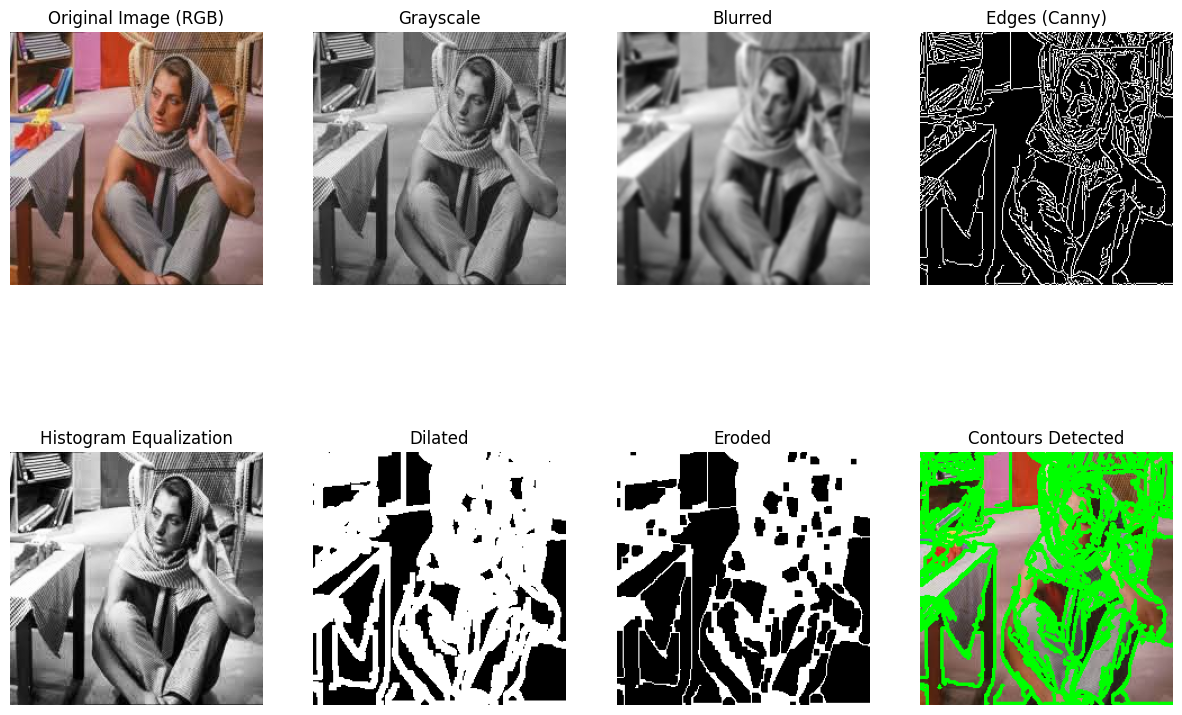

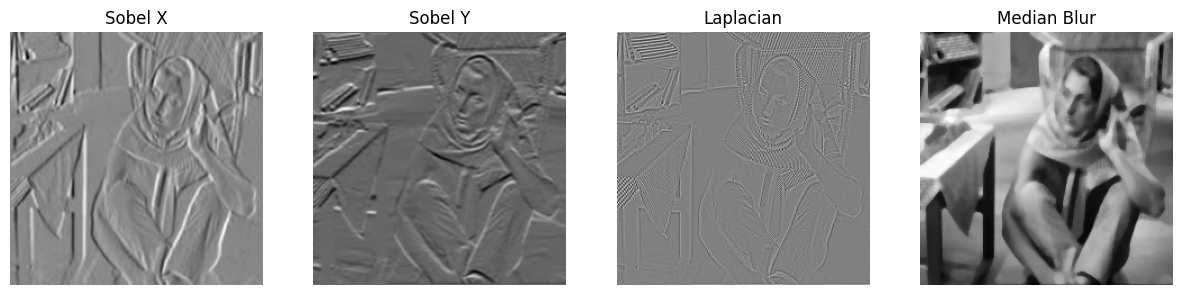

Processing Complete!


In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Define a function to display images with subplots
def display_images(images, titles, cmap=None):
    plt.figure(figsize=(15, 10))
    for i in range(len(images)):
        plt.subplot(2, 4, i + 1)
        if cmap:
            plt.imshow(images[i], cmap=cmap)
        else:
            plt.imshow(images[i])
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Read Image from Google Drive
image_path = '/content/drive/My Drive/DIP/barbara.jpg'
image = cv2.imread(image_path)

if image is None:
    raise FileNotFoundError(f"Error: Could not read image from {image_path}. Please check the file path and ensure the image is not corrupted.")

# Convert BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 1. Image Blurring
blurred = cv2.GaussianBlur(gray, (7,7), 0)

# 2. Edge Detection (Canny)
edges = cv2.Canny(gray, 50, 150)

# 3. Histogram Equalization
equalized = cv2.equalizeHist(gray)

# 4. Morphological Operations
kernel = np.ones((5,5), np.uint8)
dilated = cv2.dilate(edges, kernel, iterations=1)
eroded = cv2.erode(dilated, kernel, iterations=1)

# 5. Contour Detection
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_image = image_rgb.copy()
cv2.drawContours(contour_image, contours, -1, (0,255,0), 2)

# 6. Applying Filters (Sobel, Laplacian, Median Blur)
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
laplacian = cv2.Laplacian(gray, cv2.CV_64F)
median_blur = cv2.medianBlur(gray, 5)

# Display all results using subplots
display_images(
    [image_rgb, gray, blurred, edges, equalized, dilated, eroded, contour_image],
    ["Original Image (RGB)", "Grayscale", "Blurred", "Edges (Canny)", "Histogram Equalization", "Dilated", "Eroded", "Contours Detected"],
    cmap='gray'
)

display_images(
    [sobelx, sobely, laplacian, median_blur],
    ["Sobel X", "Sobel Y", "Laplacian", "Median Blur"],
    cmap='gray'
)

print("Processing Complete!")
